In [37]:
# following example notebooks from https://github.com/facebookresearch/segment-anything

from segment_anything import build_sam, sam_model_registry, SamPredictor, SamAutomaticMaskGenerator
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
using_colab = False
default_checkpt = "model/sam_vit_h_4b8939.pth"
model_type = "vit_h"

filename = "/content/drive/MyDrive/images/tinkercad.png"
# img is a PIL image
img = Image.open(filename)

In [24]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

In [25]:
image = cv2.imread('images/simple.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

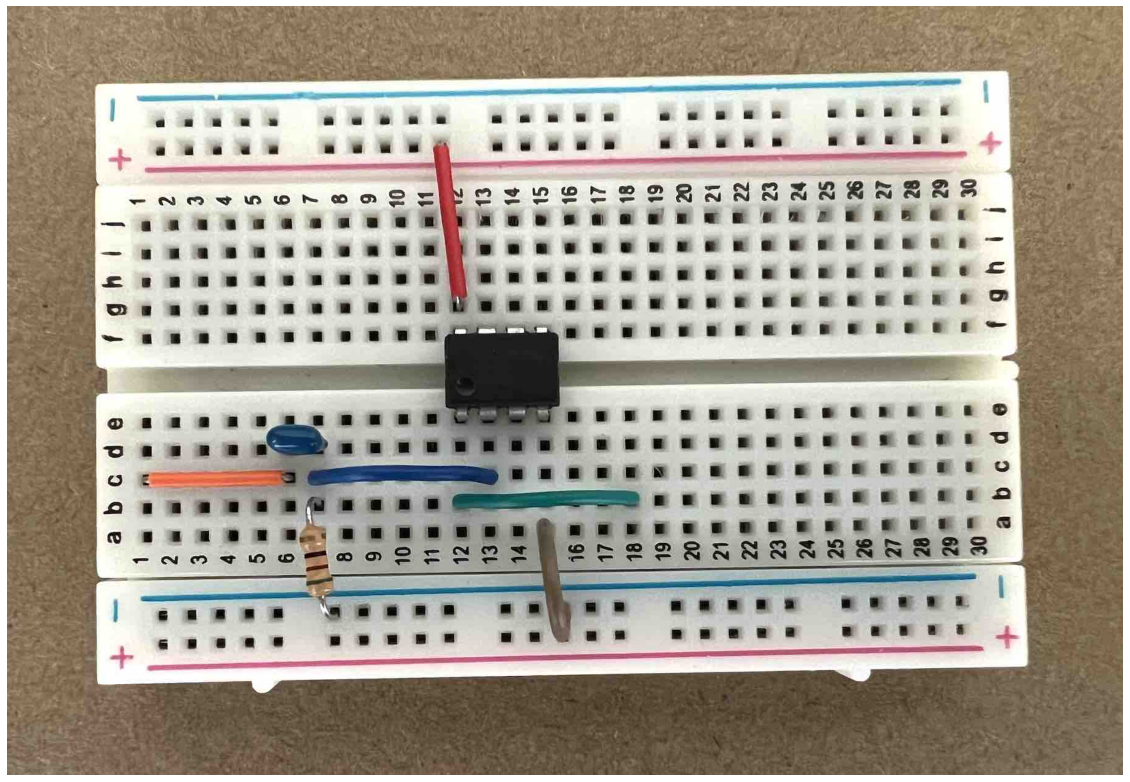

In [26]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [29]:
sam = sam_model_registry[model_type](checkpoint=default_checkpt)
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.95,
    stability_score_thresh=0.92,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,  # Requires open-cv to run post-processing
)
masks2 = mask_generator_2.generate(image)

In [1]:
plt.figure(figsize=(20,20))
plt.imshow(image)
#show_anns(masks2)
plt.axis('off')
plt.show() 

# save the image with the masks as a png
plt.imsave('images/simple_masked.png', image)
# save the masks and overlay 
plt.imsave('images/simple_masked_overlay.png', masks2)

NameError: name 'plt' is not defined

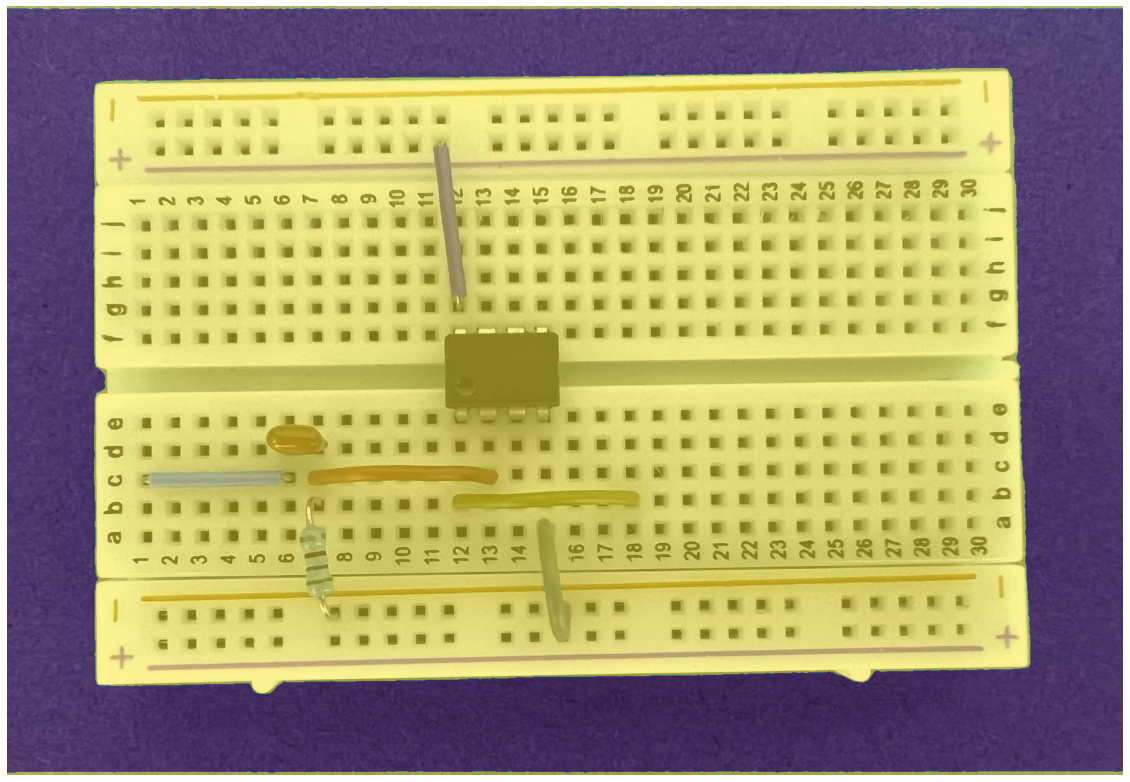

In [63]:
# sort the masks by area
masks2 = sorted(masks2, key=(lambda x: x['area']), reverse=True)

# background mask
background_mask = masks2[0]['segmentation'] # the largest one
# invert the mask
board_mask = 1 - background_mask
# save the mask as a png file
cv2.imwrite('images/board_mask.png', board_mask*255)

# show the mask on the image
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.imshow(board_mask, alpha=0.8)
plt.axis('off')
plt.show()
